# Comparison of Classifiers for Student Performance Prediction

## The dataset


### What is the purpose of the dataset?
This dataset is for creating classification models that will predict the students dropout and their academic success.

### What are the features


Each instance in the dataset represents a student.

### What is the target?

The target is


## Analyzing the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix,roc_curve, auc,ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import label_binarize



In [4]:
dataset = pd.read_csv('dataset_student_performance.csv',sep=";")
dataset.info()
#dataframe = pd.DataFrame(dataset)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [4]:
#dataset.head()

## "Data washing"

By looking at the contents of the dataset. We observe that the features are already encoded into integers.
So what we will need to do is 
- Split the features into categorical and numerical features.

After that is done, we will need to 
- Encode the categorical ones differently so they are not integers, we can achieve this by using one hot encoding.

### Splitting the features into categorical and numerical features

By using the dataset.info(), we can see what features are numerical and integer(categorical).
We need to be cautious to not assume all the integers are categorical. For instance, age, is not a catagorical feature even though it's an integer.

The numerical:

- 6,   Previous qualification (grade)                  , float64
- 12,  Admission grade                                 , float64
- 25,  Curricular units 1st sem (grade)                , float64
- 31,  Curricular units 2nd sem (grade)                , float64
- 33,  Unemployment rate                               , float64
- 34,  Inflation rate                                  , float64
- 35,  GDP                                             , float64

The target: 
- 36  Target,  object, which is three categories, encoded as ints. (dropout, enrolled, and graduate)

By inspecting the documentation further, we can now make an overview over what integers are categorical, and which are not.

The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The non categorical: 

- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32  Curricular units 2nd sem (without evaluations), int64  


So, now we can combine them and perphaps group them into the following:


The categorical:

- 0,   Marital status, int64  
- 1,   Application mode, int64  
- 2,   Application order, int64  
- 3,   Course, int64  
- 4,   Daytime/evening attendance, int64  
- 5,   Previous qualification, int64  
- 7,   Nacionality, int64  
- 8,   Mother's qualification, int64  
- 9,   Father's qualification, int64  
- 10,  Mother's occupation, int64  
- 11,  Father's occupation, int64  
- 13,  Displaced, int64  
- 14,  Educational special needs, int64  
- 15,  Debtor, int64  
- 16,  Tuition fees up to date, int64  
- 17,  Gender, int64  
- 18,  Scholarship holder, int64 
- 20,  International, int64 

The numerical:

- 6,  Previous qualification (grade), float64
- 12, Admission grade, float64
- 25, Curricular units 1st sem (grade), float64
- 31, Curricular units 2nd sem (grade), float64
- 33, Unemployment rate, float64
- 34, Inflation rate, float64
- 35, GDP, float64
- 19, Age at enrollment, int64
- 21, Curricular units 1st sem (credited),  int64  
- 22, Curricular units 1st sem (enrolled),  int64  
- 23, Curricular units 1st sem (evaluations),  int64  
- 24, Curricular units 1st sem (approved),  int64  
- 26, Curricular units 1st sem (without evaluations),  int64  
- 27, Curricular units 2nd sem (credited),  int64  
- 28, Curricular units 2nd sem (enrolled),  int64  
- 29, Curricular units 2nd sem (evaluations),  int64  
- 30, Curricular units 2nd sem (approved),  int64  
- 32, Curricular units 2nd sem (without evaluations), int64  

The target(categorical): 
- 36  Target,  object

In [5]:
#print(dataset.columns.tolist())
#Here we can double check that the syntax of the lists are correct according to the index.
#'Daytime/evening attendance\t' will give an index error if the \t is not included.

In [5]:
categorical_features = [
    "Marital status", "Application mode", "Application order", "Course", 
    "Daytime/evening attendance\t", "Previous qualification", "Nacionality", 
    "Mother's qualification", "Father's qualification", "Mother's occupation", 
    "Father's occupation", "Displaced", "Educational special needs", "Debtor", 
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

numerical_features = [
    "Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (grade)", 
    "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", 
    "Age at enrollment", "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)", 
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", 
    "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)", 
    "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)", 
    "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (without evaluations)"
]

target = "Target"
dataset_categorical = dataset[categorical_features]
dataset_numerical = dataset[numerical_features]
dataset_target = dataset[target]

<Axes: >

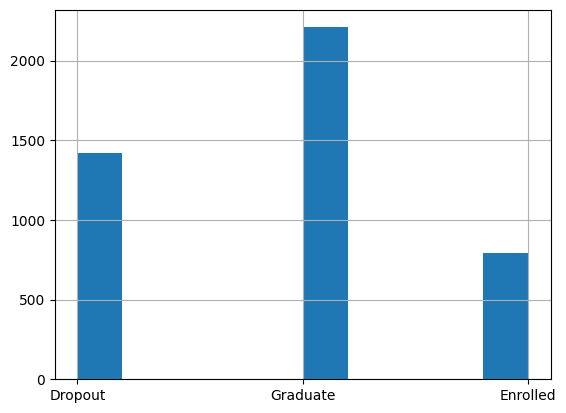

In [6]:
dataset_target.hist()

We could balance the classes, because we can see that the model will train on more graduate since there is more data in that output.

In [8]:
#dataset_oversampled,_ = SMOTENC('auto').fit_resample(categorical_features, dataset['Target'])
#dataset_oversampled_dataframe = pd.concat


## Making Onehot encoding of the categorical features


In [7]:
from sklearn.preprocessing import LabelEncoder

dataset_categorical_onehot = pd.get_dummies(dataset_categorical)
#dataset_target_onehot = pd.get_dummies(dataset_target)

label_encoder = LabelEncoder()


dataset['Target'] = pd.DataFrame(label_encoder.fit_transform(dataset_target))
#target_encoded.info()

## Now lets combine them together again


In [8]:
combined_dataset = pd.concat([dataset_numerical, dataset['Target'], dataset_categorical_onehot], axis=1)
combined_dataset.head()
#combined_dataset.info()

,Previous qualification (grade),Admission grade,Curricular units 1st sem (grade),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),...,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,International
0,122.0,127.3,0.000000,0.000000,10.8,1.4,1.74,20,0,0,...,12,5,9,1,0,0,1,1,0,0
1,160.0,142.5,14.000000,13.666667,13.9,-0.3,0.79,19,0,6,...,3,3,3,1,0,0,0,1,0,0
2,122.0,124.8,0.000000,0.000000,10.8,1.4,1.74,19,0,6,...,37,9,9,1,0,0,0,1,0,0
3,122.0,119.6,13.428571,12.400000,9.4,-0.8,-3.12,20,0,6,...,37,5,3,1,0,0,1,0,0,0
4,100.0,141.5,12.333333,13.000000,13.9,-0.3,0.79,45,0,6,...,38,9,9,0,0,0,1,0,0,0


## Creating our split

In [9]:
train_val = combined_dataset.groupby(dataset['Target'], group_keys=False)[combined_dataset.columns].apply(lambda x: x.sample(frac=0.8))
test_set = combined_dataset.drop(train_val.index)

In [10]:
features = combined_dataset.drop('Target', axis=1)
targets = combined_dataset['Target']

train_val_features = train_val.drop('Target', axis=1)
train_val_targets = train_val['Target']

test_features = test_set.drop('Target', axis=1)
test_targets = test_set['Target']

## Pre-proccessing 

Lets proceed with the dataset now, and see what kind of results it produces. After that we can take pre processing steps to see how it changes the result.
But here we can expand by trying out normalization, PCA, etc.

## Splitting

### Why this split percentage
### Why this sampling technique

## Creating the models


### Evaluation function


In [11]:
def evaluate(model):
    train_probabilities = model.predict_proba(train_val_features)
    train_predictions = model.classes_.take(np.argmax(train_probabilities, axis=1), axis=0)

    print(f'Training Accuracy: {accuracy_score(train_val_targets, train_predictions)}')
    print(f'Training Precision: {precision_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training Recall: {recall_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training F1: {f1_score(train_val_targets, train_predictions, average="micro")}')
    print(f'Training ROC AUC: {roc_auc_score(train_val_targets, train_probabilities, average="micro", multi_class="ovr")}')

    test_probabilities = model.predict_proba(test_features)
    test_predictions = model.classes_.take(np.argmax(test_probabilities, axis=1), axis=0)

    print(f'Test Accuracy: {accuracy_score(test_targets, test_predictions)}')
    print(f'Test Precision: {precision_score(test_targets, test_predictions, average="micro")}')
    print(f'Test Recall: {recall_score(test_targets, test_predictions, average="micro")}')
    print(f'Test F1: {f1_score(test_targets, test_predictions, average="micro")}')
    print(f'Test ROC AUC: {roc_auc_score(test_targets, test_probabilities, average="micro", multi_class="ovr")}')
    print()


## Tuning the hyperparameters

### Grid search

In [12]:
metrics = ['accuracy', 'precision_micro', 'recall_micro', 'f1_micro', 'roc_auc_ovr']


## Creating a function for GridSearch

### and creating param grid dictionaries

In [14]:
param_grid_RF = {
        'max_depth': np.arange(1, 15, 5),
        'n_estimators': np.arange(5, 100, 10),
        'max_features': np.arange(0.1, 1.0, 0.05),
        }


param_grid_GB = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 0.25, 0.05),
    'max_depth': np.arange(3, 11, 2)
    }


param_grid_ADA = {
    'n_estimators': np.arange(50, 201, 50),
    'learning_rate': np.arange(0.01, 1.1, 0.3),
    'estimator__max_depth': np.arange(1, 6, 2)
    }


param_grid_NB = {
    'var_smoothing': np.logspace(-9, -6, 4)  # 1e-9, 1e-8, 1e-7, 1e-6 ?
    }


In [15]:
def train_grid_search(classifier, parameter_grid, scoring,refit, features, target, cv=5, verbose=1):
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=parameter_grid,
        scoring=scoring,
        refit=refit,
        cv=cv,
        verbose=verbose,
        n_jobs=-1
    )

    grid_search.fit(features, target)
    results = pd.DataFrame(grid_search.cv_results_)
    best_model = grid_search.best_estimator_

    print(f"best parameters: {grid_search.best_params_}")
    print(f"best score: {grid_search.best_score_:.4f}")

    return best_model, results

In [87]:
train_grid_search(RandomForestClassifier(),param_grid_RF,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


C:\Users\Stavros\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


best parameters: {'max_depth': np.int64(11), 'max_features': np.float64(0.15000000000000002), 'n_estimators': np.int64(95)}
best score: 0.7683


(RandomForestClassifier(max_depth=np.int64(11),
                        max_features=np.float64(0.15000000000000002),
                        n_estimators=np.int64(95)),
      mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0         0.019364      0.004858         0.019284        0.003640   
 1         0.036262      0.003109         0.023757        0.002531   
 2         0.057150      0.002554         0.021465        0.001808   
 3         0.062448      0.002846         0.020608        0.003431   
 4         0.087906      0.004529         0.025407        0.004859   
 ..             ...           ...              ...             ...   
 535       1.141992      0.005953         0.028084        0.003558   
 536       1.338645      0.005741         0.029390        0.002824   
 537       1.543234      0.011359         0.032368        0.002007   
 538       1.732258      0.024729         0.031032        0.004814   
 539       1.775446      0.071625         0.029986        0.

In [19]:
train_grid_search(GradientBoostingClassifier(),param_grid_GB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best parameters: {'learning_rate': np.float64(0.21000000000000002), 'max_depth': np.int64(3), 'n_estimators': np.int64(100)}
best score: 0.7810


(GradientBoostingClassifier(learning_rate=np.float64(0.21000000000000002),
                            max_depth=np.int64(3), n_estimators=np.int64(100)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        1.165835      0.031964         0.029651        0.002646   
 1        2.303711      0.037767         0.031203        0.002482   
 2        3.428732      0.042859         0.034649        0.001814   
 3        4.621440      0.085012         0.035516        0.002395   
 4        2.094399      0.010731         0.027920        0.001600   
 ..            ...           ...              ...             ...   
 75      13.371546      0.061171         0.054244        0.002352   
 76       5.588377      0.061505         0.037547        0.000825   
 77      10.761437      0.094236         0.045317        0.001911   
 78      14.591461      0.115546         0.053397        0.002813   
 79      16.076138      0.523196         0.060843        0.004951   
 
     param_lear

In [20]:
train_grid_search(AdaBoostClassifier(estimator=DecisionTreeClassifier()),param_grid_ADA,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


c:\Users\Stavros\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


best parameters: {'estimator__max_depth': np.int64(1), 'learning_rate': np.float64(0.31), 'n_estimators': np.int64(200)}
best score: 0.7666


(AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=np.int64(1)),
                    learning_rate=np.float64(0.31), n_estimators=np.int64(200)),
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0        0.389651      0.010540         0.044789        0.001598   
 1        0.760135      0.030647         0.064905        0.003584   
 2        1.099608      0.004211         0.087510        0.003541   
 3        1.478571      0.056958         0.109264        0.009777   
 4        0.368679      0.011171         0.046537        0.000606   
 5        0.734653      0.014534         0.066592        0.003771   
 6        1.143386      0.066740         0.089406        0.007375   
 7        1.467689      0.052618         0.110225        0.007292   
 8        0.364946      0.004213         0.048995        0.007864   
 9        0.718241      0.008701         0.065424        0.003414   
 10       1.107066      0.040301         0.086134        0.003304   
 11       1.45

In [21]:
train_grid_search(GaussianNB(),param_grid_NB,metrics,'f1_micro',train_val_features,train_val_targets)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best parameters: {'var_smoothing': np.float64(1e-08)}
best score: 0.6889


(GaussianNB(var_smoothing=np.float64(1e-08)),
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       0.006261      0.000619         0.019979        0.001514   
 1       0.008162      0.000871         0.020468        0.000869   
 2       0.008128      0.001300         0.017526        0.001153   
 3       0.006693      0.000551         0.014530        0.000941   
 
    param_var_smoothing                    params  split0_test_accuracy  \
 0         1.000000e-09  {'var_smoothing': 1e-09}              0.689266   
 1         1.000000e-08  {'var_smoothing': 1e-08}              0.689266   
 2         1.000000e-07  {'var_smoothing': 1e-07}              0.662429   
 3         1.000000e-06  {'var_smoothing': 1e-06}              0.637006   
 
    split1_test_accuracy  split2_test_accuracy  split3_test_accuracy  ...  \
 0              0.683616              0.656780              0.679379  ...   
 1              0.710452              0.655367              0.682203  ...   
 2  

## Creating the classifiers


In [21]:
random_forest_model = RandomForestClassifier(max_depth=11,max_features=0.25,n_estimators=75)
random_forest_model.fit(train_val_features,train_val_targets)

RandomForestClassifier(max_depth=11, max_features=0.25, n_estimators=75)

In [23]:
evaluate(random_forest_model)

Training Accuracy: 0.9355750211924272
Training Precision: 0.9355750211924272
Training Recall: 0.9355750211924272
Training F1: 0.9355750211924272
Training ROC AUC: 0.9876871139423217
Test Accuracy: 0.7672316384180791
Test Precision: 0.7672316384180791
Test Recall: 0.7672316384180791
Test F1: 0.7672316384180791
Test ROC AUC: 0.9113843403875006



In [22]:
gradient_booster_model = GradientBoostingClassifier(learning_rate=0.21,max_depth=3,n_estimators=150)
gradient_booster_model.fit(train_val_features,train_val_targets)

GradientBoostingClassifier(learning_rate=0.21, n_estimators=150)

In [25]:
evaluate(gradient_booster_model)

Training Accuracy: 0.9265329189036451
Training Precision: 0.9265329189036451
Training Recall: 0.9265329189036451
Training F1: 0.9265329189036451
Training ROC AUC: 0.9869946722912598
Test Accuracy: 0.7491525423728813
Test Precision: 0.7491525423728813
Test Recall: 0.7491525423728813
Test F1: 0.7491525423728813
Test ROC AUC: 0.9109278942832518



In [23]:
ada_booster_model = AdaBoostClassifier(learning_rate=0.61,n_estimators=200) # adding estimator__depth=1 makes things too difficult

ada_booster_model.fit(train_val_features,train_val_targets)

C:\Users\Stavros\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.61, n_estimators=200)

In [27]:
evaluate(ada_booster_model)

Training Accuracy: 0.7869454648205708
Training Precision: 0.7869454648205708
Training Recall: 0.7869454648205708
Training F1: 0.7869454648205708
Training ROC AUC: 0.9013619363167661
Test Accuracy: 0.7593220338983051
Test Precision: 0.7593220338983051
Test Recall: 0.7593220338983051
Test F1: 0.7593220338983051
Test ROC AUC: 0.8788694181110153



In [24]:
naive_bayes_model = GaussianNB(var_smoothing=1e-08)
naive_bayes_model.fit(train_val_features,train_val_targets)

GaussianNB(var_smoothing=1e-08)

In [29]:
evaluate(naive_bayes_model)


Training Accuracy: 0.6925685221814072
Training Precision: 0.6925685221814072
Training Recall: 0.6925685221814072
Training F1: 0.6925685221814072
Training ROC AUC: 0.8277410369626113
Test Accuracy: 0.6949152542372882
Test Precision: 0.6949152542372882
Test Recall: 0.6949152542372882
Test F1: 0.6949152542372882
Test ROC AUC: 0.8172271697149605



## The results

Random forest:

- Training Accuracy: 0.9355750211924272
- Training Precision: 0.9355750211924272
- Training Recall: 0.9355750211924272
- Training F1: 0.9355750211924272
- Training ROC AUC: 0.986769673666562
- Test Accuracy: 0.7796610169491526
- Test Precision: 0.7796610169491526
- Test Recall: 0.7796610169491526
- Test F1: 0.7796610169491526
- Test ROC AUC: 0.9200555395959016


Gradient booster:

- Training Accuracy: 0.919468776490534
- Training Precision: 0.919468776490534
- Training Recall: 0.919468776490534
- Training F1: 0.919468776490534
- Training ROC AUC: 0.9849100815911443
- Test Accuracy: 0.7706214689265537
- Test Precision: 0.7706214689265537
- Test Recall: 0.7706214689265537
- Test F1: 0.7706214689265537
- Test ROC AUC: 0.9246704331450094

Ada booster:

- Training Accuracy: 0.7855326363379486
- Training Precision: 0.7855326363379486
- Training Recall: 0.7855326363379486
- Training F1: 0.7855326363379486
- Training ROC AUC: 0.8923516516120655
- Test Accuracy: 0.7728813559322034
- Test Precision: 0.7728813559322034
- Test Recall: 0.7728813559322034
- Test F1: 0.7728813559322034
- Test ROC AUC: 0.8779495036547609

GaussianDB:

- Training Accuracy: 0.6908731280022605
- Training Precision: 0.6908731280022605
- Training Recall: 0.6908731280022605
- Training F1: 0.6908731280022605
- Training ROC AUC: 0.8247690270949284
- Test Accuracy: 0.6903954802259887
- Test Precision: 0.6903954802259887
- Test Recall: 0.6903954802259887
- Test F1: 0.6903954802259887
- Test ROC AUC: 0.8304315490440166





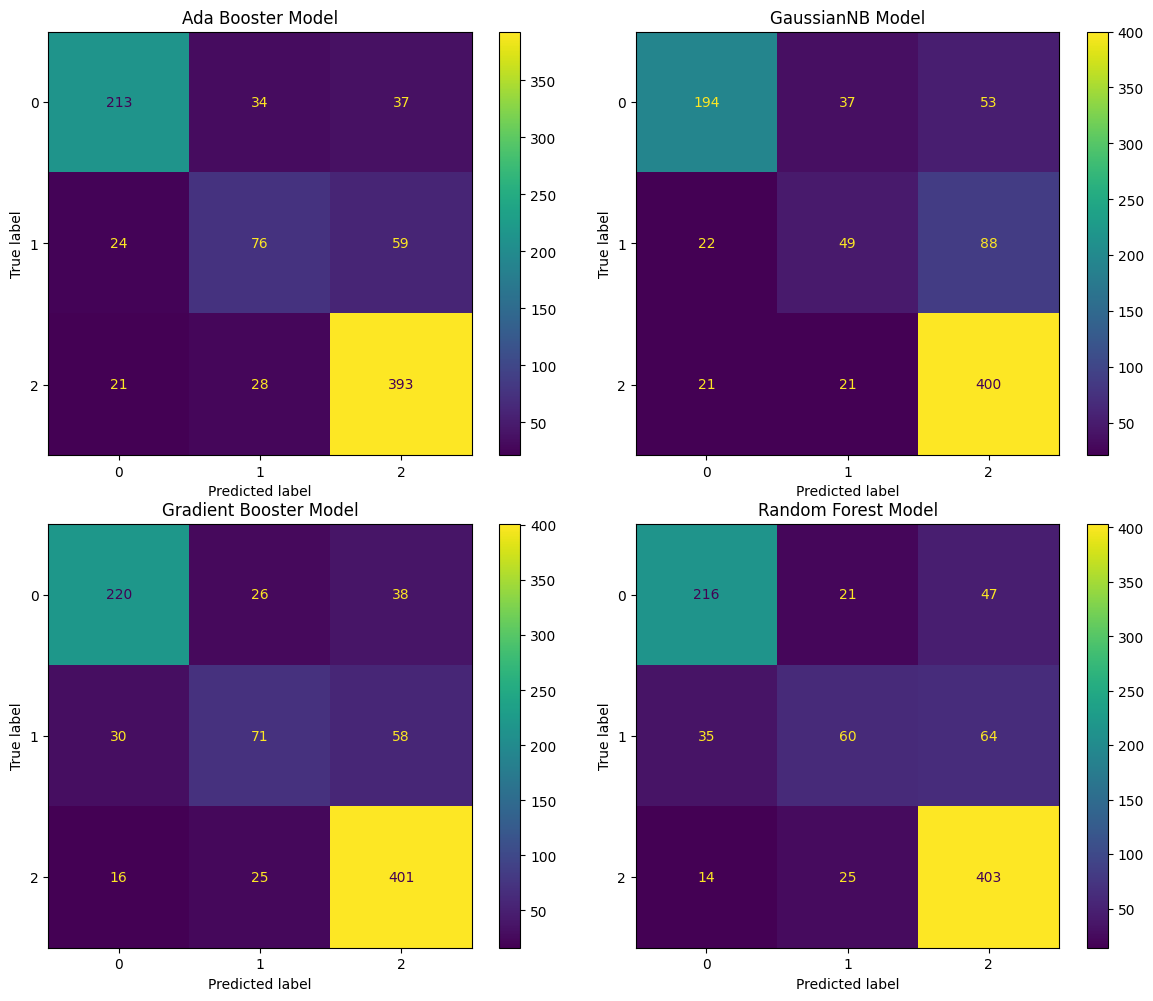

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

ConfusionMatrixDisplay.from_estimator(ada_booster_model, test_features, test_targets, ax=axes[0, 0])
axes[0, 0].set_title("Ada Booster Model")

ConfusionMatrixDisplay.from_estimator(naive_bayes_model, test_features, test_targets, ax=axes[0, 1])
axes[0, 1].set_title("GaussianNB Model")

ConfusionMatrixDisplay.from_estimator(gradient_booster_model, test_features, test_targets, ax=axes[1, 0])
axes[1, 0].set_title("Gradient Booster Model")

ConfusionMatrixDisplay.from_estimator(random_forest_model, test_features, test_targets, ax=axes[1, 1])
axes[1, 1].set_title("Random Forest Model")

plt.tight_layout()
plt.show()


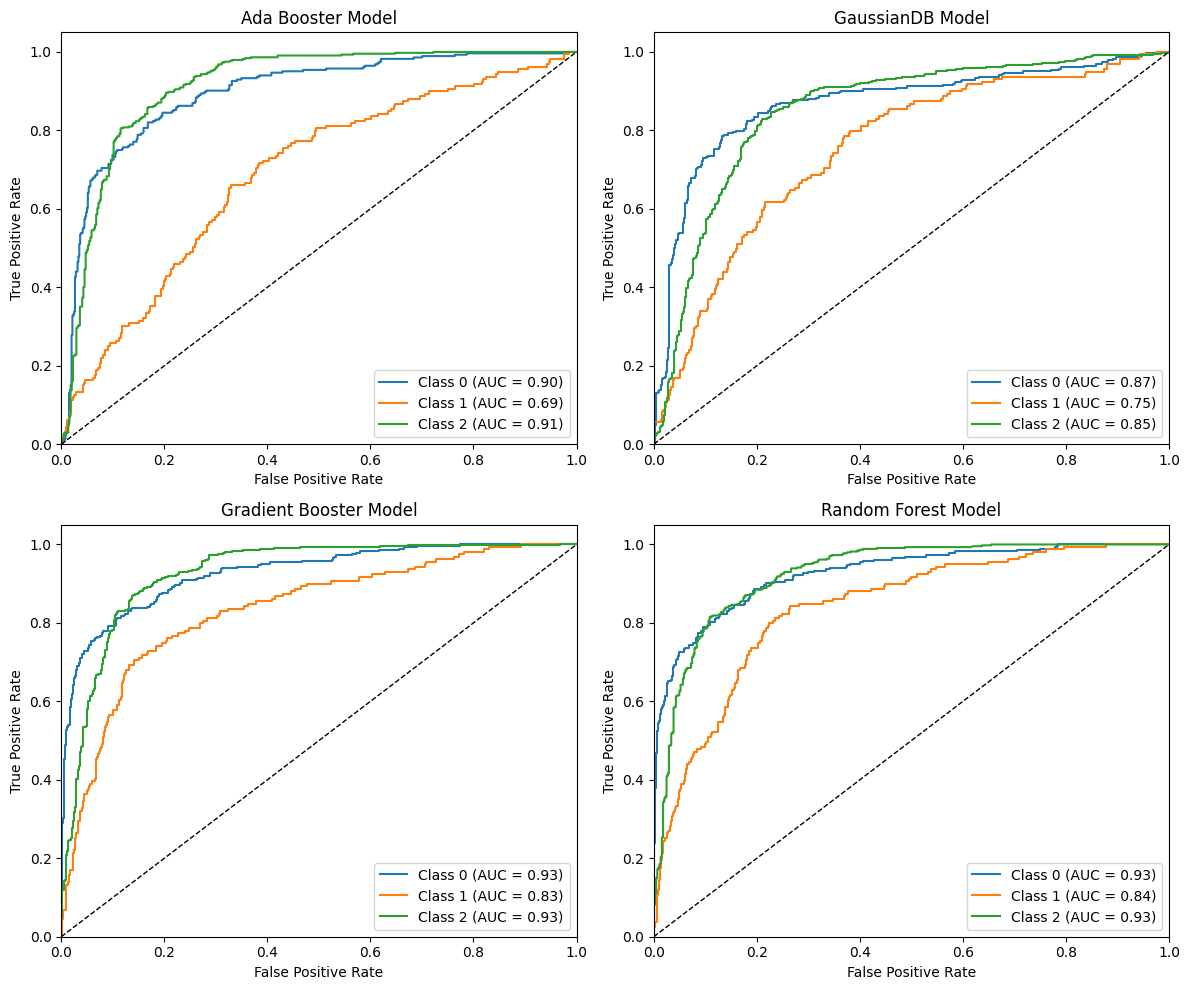

In [ ]:
classes = list(set(test_targets))
y_test_bin = label_binarize(test_targets, classes=classes)

def plot_multiclass_roc_curve(model, features, y_test_bin, ax, title, n_classes):
    y_score = model.predict_proba(features)
    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        ax.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {roc_auc:.2f})')

    ax.plot([0, 1], [0, 1], 'k--', lw=1)  # stepped diagonal line
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc="lower right")

n_classes = len(classes)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_multiclass_roc_curve(ada_booster_model, test_features, y_test_bin, axes[0, 0], "Ada Booster Model", n_classes)
plot_multiclass_roc_curve(naive_bayes_model, test_features, y_test_bin, axes[0, 1], "GaussianDB Model", n_classes)
plot_multiclass_roc_curve(gradient_booster_model, test_features, y_test_bin, axes[1, 0], "Gradient Booster Model", n_classes)
plot_multiclass_roc_curve(random_forest_model, test_features, y_test_bin, axes[1, 1], "Random Forest Model", n_classes)

plt.tight_layout()
plt.show()


## Comparison of the classifiers

Based on the results the random forest model seems to give the highest score. 

In [ ]:
'''
def create_pipeline(classifier):
    return Pipeline([
        ('scaler', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('pca', ColumnTransformer([('standard', StandardScaler(), dataset_numerical)])), 
        ('classifier', classifier)])

dt_pipeline = create_pipeline(DecisionTreeClassifier())

dt_params = {
    'scaler__transformers': [[('no_scaling', 'passthrough', dataset_numerical)], [('standard', StandardScaler(), dataset_numerical)]]
}


#GridSeachCV(dt_pipeline, dt_params) Fill out here
'''

## Conclusion

## Possible improvements

- Using pipeline in the "data washing"
- Adding results to a dataframe for clearer comparison
- Adding confussion matrix

# Neural Networks


In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

from IPython.display import clear_output
from keras.src.callbacks import ModelCheckpoint

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.src.layers import Input, Dense, Dropout, Flatten, Softmax, BatchNormalization
from keras.src.models import Sequential
from keras.src.callbacks import Callback

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
train_val_features.shape

(3539, 36)

In [ ]:
neural_network_seq = Sequential([
    Input(shape=(36,)),

    Dense(16, activation='sigmoid'),
    Dense(8, activation='sigmoid'),

    Dropout(0.2), 
    Dense(3, activation='sigmoid')
])

neural_network_seq.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics=['accuracy','f1_score'])
neural_network_seq.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_191 (Dense)               │ (None, 16)             │           592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_192 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_193 (Dense)               │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 755 (2.95 KB)

 Trainable params: 755 (2.95 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
neural_network_seq.fit(train_val_features,train_val_targets,epochs=20,batch_size=5)

Epoch 1/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.4373 - f1_score: 0.3361 - loss: 1.0677
Epoch 2/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4770 - f1_score: 0.2538 - loss: 1.0304
Epoch 3/20
708/708 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4798 - f1_score: 0.2470 - loss: 1.0296
Epoch 4/20
475/708 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - f1_score: 0.2424 - loss: 1.0319

KeyboardInterrupt: 

In [20]:
def nn1(num_neu=[16,8,4],activation='sigmoid'):
    nn_model1 = Sequential([
        Input(shape=(36,)),
        Dense(num_neu[0], activation=activation),
        Dense(num_neu[1], activation=activation),
        Dense(num_neu[2], activation=activation),
        Dense(3, activation='sigmoid')
    ])

    nn_model1.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy','f1_score'])
    nn_model1.summary()
    return nn_model1

In [28]:
'''
nn1_1 = nn1([32,32,16])
nn1_2 = nn1([32,16,8])
nn1_3 = nn1([16,16,8])
nn1_4 = nn1([16,8,4])
'''

'\nnn1_1 = nn1([32,32,16])\nnn1_2 = nn1([32,16,8])\nnn1_3 = nn1([16,16,8])\nnn1_4 = nn1([16,8,4])\n'

In [27]:
'''
print("First model:")
nn1_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
'''


'\nprint("First model:")\nnn1_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("2nd model:")\nnn1_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("3rd model:")\nnn1_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("4th model:")\nnn1_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\n'

In [23]:
'''
nn1_5 = nn1([32,32,16],activation='relu')
nn1_6 = nn1([32,16,8], activation='relu')
nn1_7 = nn1([16,16,8], activation='relu')
nn1_8 = nn1([16,8,4], activation='relu')
'''

"\nnn1_5 = nn1([32,32,16],activation='relu')\nnn1_6 = nn1([32,16,8], activation='relu')\nnn1_7 = nn1([16,16,8], activation='relu')\nnn1_8 = nn1([16,8,4], activation='relu')\n"

In [24]:
'''
print("First model:")
nn1_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
'''

'\nprint("First model:")\nnn1_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("2nd model:")\nnn1_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("3rd model:")\nnn1_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("4th model:")\nnn1_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\n'

In [25]:
'''
nn1_5_1 = nn1([32,16,8],activation='relu')
nn1_6_1 = nn1([32,16,8], activation='softmax')
nn1_7_1 = nn1([32,16,8], activation='softplus')
nn1_8_1 = nn1([32,16,8], activation='softsign')
'''

"\nnn1_5_1 = nn1([32,16,8],activation='relu')\nnn1_6_1 = nn1([32,16,8], activation='softmax')\nnn1_7_1 = nn1([32,16,8], activation='softplus')\nnn1_8_1 = nn1([32,16,8], activation='softsign')\n"

In [26]:
'''
print("First model:")
nn1_5_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("2nd model:")
nn1_6_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("3rd model:")
nn1_7_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("4th model:")
nn1_8_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
'''

'\nprint("First model:")\nnn1_5_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("2nd model:")\nnn1_6_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("3rd model:")\nnn1_7_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("4th model:")\nnn1_8_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\n'

# NN2 MODEL

# Tuning with different dropout possibilities.

In [ ]:
def nn2(num_neu=[16,8,4],activation='sigmoid', dropout=[(0.1),(0.2)]):
    nn_model = Sequential([
        Input(shape=(36,)),
        Dense(num_neu[0], activation=activation),
        Dropout(dropout[0]),
        Dense(num_neu[1], activation=activation),
        Dropout(dropout[1]),
        Dense(3, activation='sigmoid')
    ])

    nn_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy','f1_score'])
    nn_model.summary()
    return nn_model


In [21]:
'''
print("NN2 model 1: ")
nn2_1 = nn2([32,16,8],dropout=[(0.2),(0.2)])
print("NN2 model 2: ")
nn2_2 = nn2([32,16,8],dropout=[(0.2),(0.1)])
print("NN2 model 3: ")
nn2_3 = nn2([32,16,8],dropout=[(0.1),(0.2)])
print("NN2 model 4: ")
nn2_4 = nn2([32,16,8],dropout=[(0.1),(0.1)])
'''


'\nprint("NN2 model 1: ")\nnn2_1 = nn2([32,16,8],dropout=[(0.2),(0.2)])\nprint("NN2 model 2: ")\nnn2_2 = nn2([32,16,8],dropout=[(0.2),(0.1)])\nprint("NN2 model 3: ")\nnn2_3 = nn2([32,16,8],dropout=[(0.1),(0.2)])\nprint("NN2 model 4: ")\nnn2_4 = nn2([32,16,8],dropout=[(0.1),(0.1)])\n'

In [19]:
'''
nn2_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
nn2_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
'''


'\nnn2_1.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nnn2_2.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nnn2_3.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nnn2_4.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\n'

In [22]:
'''
print("NN2 model 5: ")
nn2_5 = nn2([32,16,8],dropout=[(0.2),(0.2)], activation='relu')
print("NN2 model 6: ")
nn2_6 = nn2([32,16,8],dropout=[(0.2),(0.1)], activation='relu')
print("NN2 model 7: ")
nn2_7 = nn2([32,16,8],dropout=[(0.1),(0.2)], activation='relu')
print("NN2 model 8: ")
nn2_8 = nn2([32,16,8],dropout=[(0.1),(0.1)], activation='relu')
'''

'\nprint("NN2 model 5: ")\nnn2_5 = nn2([32,16,8],dropout=[(0.2),(0.2)], activation=\'relu\')\nprint("NN2 model 6: ")\nnn2_6 = nn2([32,16,8],dropout=[(0.2),(0.1)], activation=\'relu\')\nprint("NN2 model 7: ")\nnn2_7 = nn2([32,16,8],dropout=[(0.1),(0.2)], activation=\'relu\')\nprint("NN2 model 8: ")\nnn2_8 = nn2([32,16,8],dropout=[(0.1),(0.1)], activation=\'relu\')\n'

In [18]:
'''
print("NN2 MODEL5: ")
nn2_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL6: ")
nn2_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL7: ")
nn2_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
print("NN2 MODEL8: ")
nn2_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)
'''


'\nprint("NN2 MODEL5: ")\nnn2_5.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("NN2 MODEL6: ")\nnn2_6.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("NN2 MODEL7: ")\nnn2_7.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\nprint("NN2 MODEL8: ")\nnn2_8.fit(train_val_features,train_val_targets,epochs=20,batch_size=4)\n'

In [17]:
def create(drop_out):
    model = Sequential([
        Input(shape=(36,)),

        Dense(16, activation='sigmoid'),
        Dropout(drop_out),
        Dense(8, activation='sigmoid'),
        Dropout(drop_out),
        Dense(3, activation='sigmoid')
    ])
   
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
    return model


classifier = KerasClassifier(create, drop_out=0.1, epochs=10, batch_size=32)


params = {'drop_out':[0.1, 0.2, 0.3]}


grid = GridSearchCV(classifier, params)
grid.fit(train_val_features, train_val_targets);

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4852 - loss: 1.0474
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.4791 - loss: 1.0337
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step - accuracy: 0.4749 - loss: 1.0260
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.4824 - loss: 1.0355
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4943 - loss: 1.0177  
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step - accuracy: 0.4865 - loss: 1.0236
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - accuracy: 0.4761 - loss: 1.0301
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - accuracy: 0.5020 - loss: 1.0142
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.4902 - loss: 1.0327
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.4833 - loss: 1.0284
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.3141 - loss: 1.3188
Epoch 2/10
89/8